Hi, I'm **Aydin**, a passionate and growing **Deep Learning Developer** with a strong foundation in computer vision, neural networks, and Python-based machine learning frameworks such as **Keras** and **TensorFlow**.

This mini project on **CIFAR-10 image classification** is part of my portfolio to demonstrate:

* My ability to work with real-world datasets
* Build, train, and evaluate deep CNN architectures
* Understand model performance with visualization
* Save, load, and deploy trained models


## CIFAR-10 Image Classification with CNN

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

# Load CIFAR-10

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


print("Training data:", x_train.shape, y_train.shape)
print("Test data:", x_test.shape, y_test.shape)

Training data: (50000, 32, 32, 3) (50000, 1)
Test data: (10000, 32, 32, 3) (10000, 1)


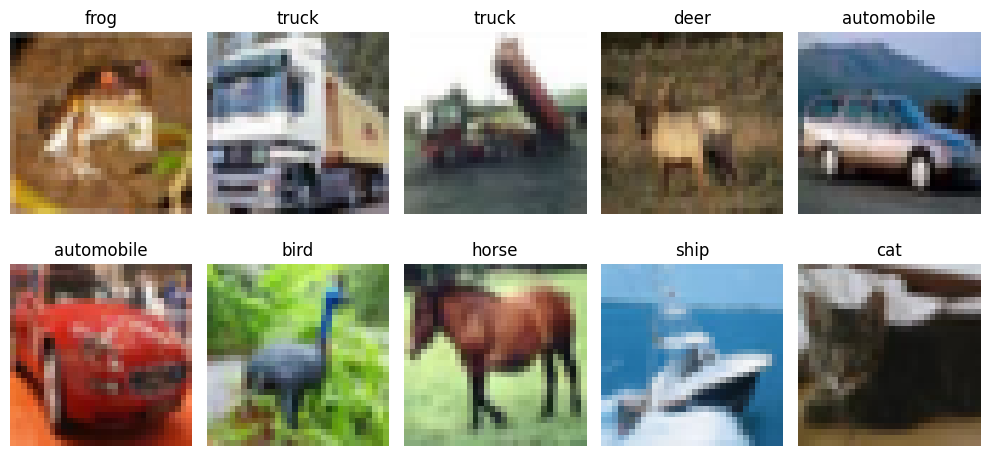

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot some images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [10]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels to categorical
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)


# Build CNN Model

In [11]:
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = build_model()
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 893,226 (3.41 MB)

 Trainable params: 891,818 (3.40 MB)

 Non-trainable params: 1,408 (5.50 KB)

# Compile and train the Model

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True), # Add early stopping and model checkpoint
    keras.callbacks.ModelCheckpoint("best_cifar10_model.h5", save_best_only=True)
]

history = model.fit(x_train, y_train_cat,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.1,
                    callbacks=callbacks)


Epoch 1/50
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.3715 - loss: 2.0573

704/704 ━━━━━━━━━━━━━━━━━━━━ 179s 248ms/step - accuracy: 0.3718 - loss: 2.0561 - val_accuracy: 0.5256 - val_loss: 1.2938
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.5863 - loss: 1.1598

704/704 ━━━━━━━━━━━━━━━━━━━━ 205s 252ms/step - accuracy: 0.5863 - loss: 1.1597 - val_accuracy: 0.6548 - val_loss: 0.9915
Epoch 3/50
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.6569 - loss: 0.9726

704/704 ━━━━━━━━━━━━━━━━━━━━ 187s 265ms/step - accuracy: 0.6569 - loss: 0.9725 - val_accuracy: 0.6694 - val_loss: 0.9350
Epoch 4/50
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.6897 - loss: 0.8761

704/704 ━━━━━━━━━━━━━━━━━━━━ 176s 250ms/step - accuracy: 0.6897 - loss: 0.8760 - val_accuracy: 0.7170 - val_loss: 0.8186
Epoch 5/50
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.7234 - loss: 0.7923

704/704 ━━━━━━━━━━━━━━━━━━━━ 203s 252ms/step - accuracy: 0.7234 - loss: 0.7923 - val_accuracy: 0.7208 - val_loss: 0.8064
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 201s 251ms/step - accuracy: 0.7398 - loss: 0.7346 - val_accuracy: 0.7102 - val_loss: 0.8469
Epoch 7/50
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.7594 - loss: 0.6843

704/704 ━━━━━━━━━━━━━━━━━━━━ 202s 251ms/step - accuracy: 0.7594 - loss: 0.6843 - val_accuracy: 0.7474 - val_loss: 0.7291
Epoch 8/50
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.7720 - loss: 0.6465

704/704 ━━━━━━━━━━━━━━━━━━━━ 204s 254ms/step - accuracy: 0.7720 - loss: 0.6465 - val_accuracy: 0.7688 - val_loss: 0.6657
Epoch 9/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 176s 250ms/step - accuracy: 0.7846 - loss: 0.6127 - val_accuracy: 0.7726 - val_loss: 0.6669
Epoch 10/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.7912 - loss: 0.5842

704/704 ━━━━━━━━━━━━━━━━━━━━ 204s 253ms/step - accuracy: 0.7912 - loss: 0.5842 - val_accuracy: 0.7932 - val_loss: 0.6131
Epoch 11/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 211s 266ms/step - accuracy: 0.7997 - loss: 0.5613 - val_accuracy: 0.7870 - val_loss: 0.6344
Epoch 12/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.8114 - loss: 0.5309

704/704 ━━━━━━━━━━━━━━━━━━━━ 205s 254ms/step - accuracy: 0.8114 - loss: 0.5309 - val_accuracy: 0.7940 - val_loss: 0.6118
Epoch 14/50
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.8379 - loss: 0.4604

704/704 ━━━━━━━━━━━━━━━━━━━━ 174s 247ms/step - accuracy: 0.8379 - loss: 0.4604 - val_accuracy: 0.7998 - val_loss: 0.5913
Epoch 15/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 177s 251ms/step - accuracy: 0.8266 - loss: 0.4953 - val_accuracy: 0.7986 - val_loss: 0.5949
Epoch 16/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 199s 248ms/step - accuracy: 0.8163 - loss: 0.5205 - val_accuracy: 0.7802 - val_loss: 0.6794
Epoch 17/50
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.8451 - loss: 0.4325

704/704 ━━━━━━━━━━━━━━━━━━━━ 176s 249ms/step - accuracy: 0.8451 - loss: 0.4325 - val_accuracy: 0.8090 - val_loss: 0.5672
Epoch 18/50
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.8319 - loss: 0.4773

704/704 ━━━━━━━━━━━━━━━━━━━━ 204s 252ms/step - accuracy: 0.8319 - loss: 0.4772 - val_accuracy: 0.8152 - val_loss: 0.5523
Epoch 19/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 202s 253ms/step - accuracy: 0.8625 - loss: 0.3895 - val_accuracy: 0.7986 - val_loss: 0.6188
Epoch 20/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.8525 - loss: 0.4168

704/704 ━━━━━━━━━━━━━━━━━━━━ 200s 250ms/step - accuracy: 0.8525 - loss: 0.4168 - val_accuracy: 0.8232 - val_loss: 0.5467
Epoch 21/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 208s 258ms/step - accuracy: 0.8649 - loss: 0.3794 - val_accuracy: 0.8092 - val_loss: 0.5889
Epoch 22/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 191s 271ms/step - accuracy: 0.8533 - loss: 0.4036 - val_accuracy: 0.8208 - val_loss: 0.5488
Epoch 23/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 205s 275ms/step - accuracy: 0.8712 - loss: 0.3534 - val_accuracy: 0.7950 - val_loss: 0.6227
Epoch 24/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 200s 272ms/step - accuracy: 0.8732 - loss: 0.3577 - val_accuracy: 0.8248 - val_loss: 0.5599
Epoch 25/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 188s 267ms/step - accuracy: 0.8780 - loss: 0.3417 - val_accuracy: 0.8226 - val_loss: 0.5692
Epoch 26/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 226s 301ms/step - accuracy: 0.8798 - loss: 0.3403 - val_accuracy: 0.8188 - val_loss: 0.5696
Epoch 27/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 249s 283ms/step - accuracy: 0.8854 - los

# Evaluate the Model

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print("Test accuracy:", test_acc)


313/313 - 8s - 26ms/step - accuracy: 0.8160 - loss: 0.5725
Test accuracy: 0.8159999847412109


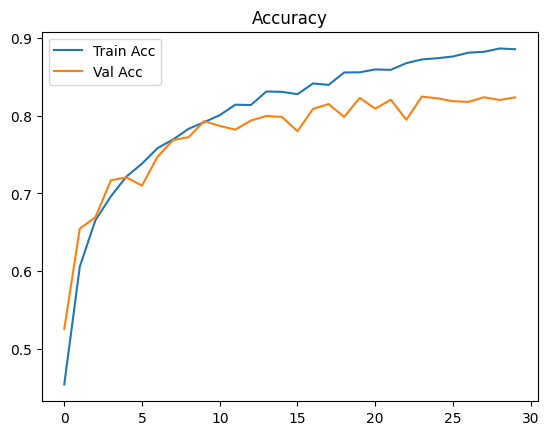

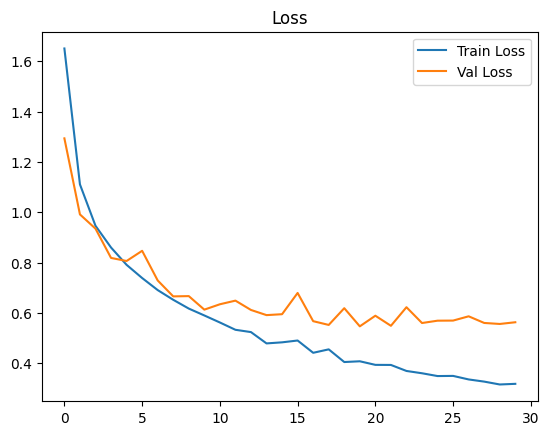

In [15]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step


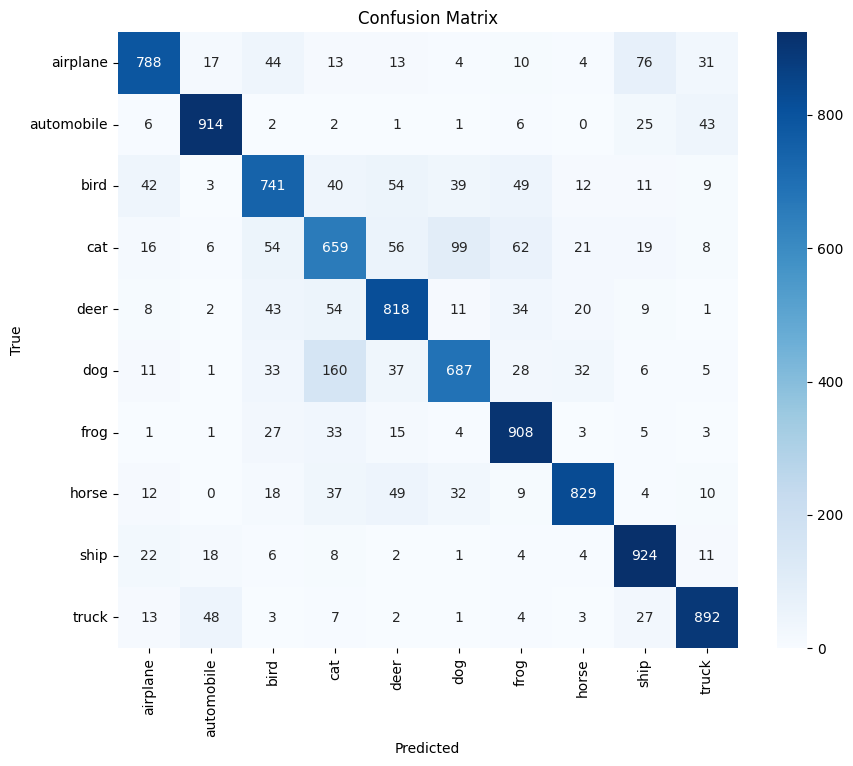

              precision    recall  f1-score   support

    airplane       0.86      0.79      0.82      1000
  automobile       0.90      0.91      0.91      1000
        bird       0.76      0.74      0.75      1000
         cat       0.65      0.66      0.65      1000
        deer       0.78      0.82      0.80      1000
         dog       0.78      0.69      0.73      1000
        frog       0.82      0.91      0.86      1000
       horse       0.89      0.83      0.86      1000
        ship       0.84      0.92      0.88      1000
       truck       0.88      0.89      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [16]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=class_names))


In [17]:
model.save("cifar10_cnn_model.keras")

In [18]:
from tensorflow.keras.models import load_model

model = load_model("best_cifar10_model.h5")

print("✅ Model loaded successfully.")


✅ Model loaded successfully.


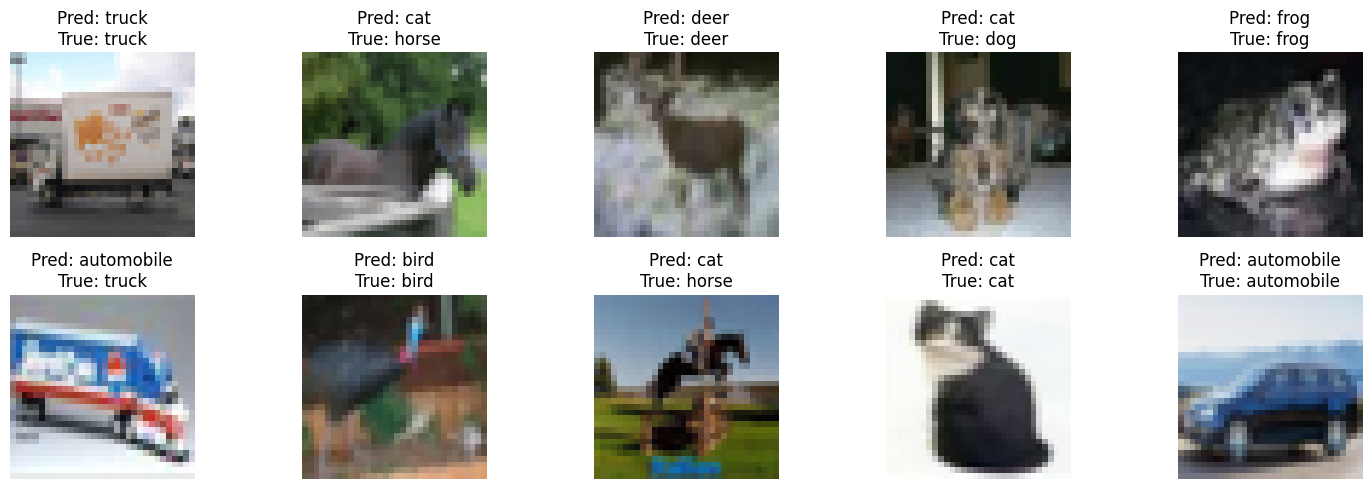

In [19]:
import random

# Pick 10 random test indices
random_indices = random.sample(range(len(x_test)), 10)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(random_indices):
    img = x_test[idx]
    true_label = class_names[y_test[idx][0]]

    # Prediction
    prediction = model.predict(np.expand_dims(img, axis=0), verbose=0)
    predicted_label = class_names[np.argmax(prediction)]


    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
